In [1]:
import torch
import torch.nn as nn

In [2]:
from torch.nn.modules import conv
class Layer1(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    # nn.Sequential doesn't work
    self.conv1 = nn.Conv3d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)
    self.instnorm = nn.InstanceNorm3d(output_channels)
    self.relu = nn.ReLU()
    self.conv = nn.Conv3d(in_channels=output_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    # block 1
    x1 = self.conv1(x)
    x2 = self.instnorm(x1)
    x3 = self.relu(x2) # concatenate this before 2nd ReLU in res block
    # print(x3.shape)

    # block 2
    x4 = self.conv(x3)
    x5 = self.instnorm(x4)
    x6 = self.relu(x5)
    x7 = self.conv(x6)
    x8 = self.instnorm(x7) # concatenate this before 2nd ReLU in res block
    # print(x8.shape)

    # element wise add
    x9 = torch.add(x3, x8)

    # relu
    x10 = self.relu(x9)
    return x10

In [3]:
class Layer2(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.conv1 = nn.Conv3d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=2, padding=1)
    self.instnorm = nn.InstanceNorm3d(output_channels)
    self.relu = nn.ReLU()
    self.conv = nn.Conv3d(in_channels=output_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    # block 1
    x1 = self.conv1(x)
    x2 = self.instnorm(x1)
    x3 = self.relu(x2)

    # block 2
    x4 = self.conv(x3)
    x5 = self.instnorm(x4)
    x6 = self.relu(x5)
    x7 = self.conv(x6)
    x8 = self.instnorm(x7) # concat
    x9 = torch.add(x8, x3)
    x10 = self.relu(x9)
    return x10

In [4]:
class Layer3(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.conv1 = nn.Conv3d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=2, padding=1)
    self.instnorm = nn.InstanceNorm3d(output_channels)
    self.relu = nn.ReLU()
    self.conv = nn.Conv3d(in_channels=output_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    # block 1
    x1 = self.conv1(x)
    x2 = self.instnorm(x1)
    x3 = self.relu(x2)

    # block 2 x1
    x4 = self.conv(x3)
    x5 = self.instnorm(x4)
    x6 = self.relu(x5)
    x7 = self.conv(x6)
    x8 = self.instnorm(x7) # concat
    x9 = torch.add(x8, x3)
    x10 = self.relu(x9)

    # block 2 x2
    x11 = self.conv(x10)
    x12 = self.instnorm(x11)
    x13 = self.relu(x12)
    x14 = self.conv(x13)
    x15 = self.instnorm(x14) # concat
    x16 = torch.add(x10, x15)
    x17 = self.relu(x16)
    return x17

In [5]:
class Layer4(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.conv1 = nn.Conv3d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=2, padding=1)
    self.instnorm = nn.InstanceNorm3d(output_channels)
    self.relu = nn.ReLU()
    self.conv = nn.Conv3d(in_channels=output_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    # block 1
    x1 = self.conv1(x)
    x2 = self.instnorm(x1)
    x3 = self.relu(x2)

    # block 2 x1
    x4 = self.conv(x3)
    x5 = self.instnorm(x4)
    x6 = self.relu(x5)
    x7 = self.conv(x6)
    x8 = self.instnorm(x7) 
    x9 = torch.add(x8, x3)
    x10 = self.relu(x9)

    # block 2 x2
    x11 = self.conv(x10)
    x12 = self.instnorm(x11)
    x13 = self.relu(x12)
    x14 = self.conv(x13)
    x15 = self.instnorm(x14)
    x16 = torch.add(x10, x15)
    x17 = self.relu(x16)

    # block 2 x3
    x18 = self.conv(x17)
    x19 = self.instnorm(x18)
    x20 = self.relu(x19)
    x21 = self.conv(x20)
    x22 = self.instnorm(x21)
    x23 = torch.add(x17, x22)
    x24 = self.relu(x23)
    return x24

In [6]:
class Layer5(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.conv1 = nn.Conv3d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=2, padding=1)
    self.instnorm = nn.InstanceNorm3d(output_channels)
    self.relu = nn.ReLU()
    self.conv = nn.Conv3d(in_channels=output_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    # block 1
    x1 = self.conv1(x)
    x2 = self.instnorm(x1)
    x3 = self.relu(x2)

    # block 2 x1
    x4 = self.conv(x3)
    x5 = self.instnorm(x4)
    x6 = self.relu(x5)
    x7 = self.conv(x6)
    x8 = self.instnorm(x7) 
    x9 = torch.add(x8, x3)
    x10 = self.relu(x9)

    # block 2 x2
    x11 = self.conv(x10)
    x12 = self.instnorm(x11)
    x13 = self.relu(x12)
    x14 = self.conv(x13)
    x15 = self.instnorm(x14)
    x16 = torch.add(x10, x15)
    x17 = self.relu(x16)

    # block 2 x3
    x18 = self.conv(x17)
    x19 = self.instnorm(x18)
    x20 = self.relu(x19)
    x21 = self.conv(x20)
    x22 = self.instnorm(x21)
    x23 = torch.add(x17, x22)
    x24 = self.relu(x23)

    # block 2 x4
    x25 = self.conv(x24)
    x26 = self.instnorm(x25)
    x27 = self.relu(x26)
    x28 = self.conv(x27)
    x29 = self.instnorm(x28)
    x30 = torch.add(x24, x29)
    x31 = self.relu(x30)
    return x31

In [7]:
class Layer6(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.conv1 = nn.Conv3d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=2, padding=1)
    self.instnorm = nn.InstanceNorm3d(output_channels)
    self.relu = nn.ReLU()
    self.conv = nn.Conv3d(in_channels=output_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    # block 1
    x1 = self.conv1(x)
    x2 = self.instnorm(x1)
    x3 = self.relu(x2)

    # block 2 x1
    x4 = self.conv(x3)
    x5 = self.instnorm(x4)
    x6 = self.relu(x5)
    x7 = self.conv(x6)
    x8 = self.instnorm(x7) 
    x9 = torch.add(x8, x3)
    x10 = self.relu(x9)

    # block 2 x2
    x11 = self.conv(x10)
    x12 = self.instnorm(x11)
    x13 = self.relu(x12)
    x14 = self.conv(x13)
    x15 = self.instnorm(x14)
    x16 = torch.add(x10, x15)
    x17 = self.relu(x16)

    # block 2 x3
    x18 = self.conv(x17)
    x19 = self.instnorm(x18)
    x20 = self.relu(x19)
    x21 = self.conv(x20)
    x22 = self.instnorm(x21)
    x23 = torch.add(x17, x22)
    x24 = self.relu(x23)

    # block 2 x4
    x25 = self.conv(x24)
    x26 = self.instnorm(x25)
    x27 = self.relu(x26)
    x28 = self.conv(x27)
    x29 = self.instnorm(x28)
    x30 = torch.add(x24, x29)
    x31 = self.relu(x30)

    # block 2 x5
    x32 = self.conv(x31)
    x33 = self.instnorm(x32)
    x34 = self.relu(x33)
    x35 = self.conv(x34)
    x36 = self.instnorm(x35)
    x37 = torch.add(x31, x36)
    x38 = self.relu(x37)
    return x38

In [8]:
class ConvBlockDecoder(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.transcov = nn.ConvTranspose3d(in_channels=input_channels, out_channels=input_channels, kernel_size=2, stride=2)
    self.conv = nn.Conv3d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)
    self.instnorm = nn.InstanceNorm3d(output_channels)
    self.relu = nn.ReLU()

  def forward(self, x, concat_tensor):
    x1 = self.transcov(x)
    x2 = torch.add(x1, concat_tensor)
    x3 = self.conv(x2)
    x4 = self.instnorm(x3)
    x5 = self.relu(x4)
    return x5

In [9]:
class ResidualUNet(nn.Module):
  def __init__(self, input_shape):
    super().__init__()
    self.layer1 = Layer1(4, 24)
    self.layer2 = Layer2(24, 48)
    self.layer3 = Layer3(48, 96)
    self.layer4 = Layer4(96, 192)
    self.layer5 = Layer5(192, 320)
    self.layer6 = Layer6(320, 320)
    self.layer7 = ConvBlockDecoder(320, 192)
    self.layer8 = ConvBlockDecoder(192, 96)
    self.layer9 = ConvBlockDecoder(96, 48)
    self.layer10 = ConvBlockDecoder(48, 24)
    self.layer11 = ConvBlockDecoder(24, 24)
    self.conv1x1x1 = nn.Conv3d(in_channels=24, out_channels=3, kernel_size=1, stride=1)
    self.softmax = nn.Softmax()

  def forward(self, x):
    print(x.shape) # [1, 4, 128, 128, 128]
    x1 = self.layer1(x)
    print(x1.shape) # [1, 24, 128, 128, 128]

    x2 = self.layer2(x1)
    print(x2.shape) # [1, 48, 64, 64, 64]

    x3 = self.layer3(x2)
    print(x3.shape) # [1, 96, 32, 32, 32]

    x4 = self.layer4(x3)
    print(x4.shape) # [1, 192, 16, 16, 16])

    x5 = self.layer5(x4)
    print(x5.shape) # [1, 320, 8, 8, 8]

    x6 = self.layer6(x5)
    print(x6.shape) # [1, 320, 4, 4, 4]

    x7 = self.layer7(x6, x5)
    print(x7.shape) # [1, 320, 4, 4, 4]

    x8 = self.layer8(x7, x4)
    print(x8.shape) # [1, 192, 8, 8, 8]

    x9 = self.layer9(x8, x3)
    print(x9.shape) # [1, 96, 16, 16, 16]

    x10 = self.layer10(x9, x2)
    print(x10.shape) # [1, 48, 32, 32, 32]

    x11 = self.layer11(x10, x1)
    print(x11.shape) # [1, 24, 64, 64, 64]

    x12 = self.conv1x1x1(x11)
    print(x12.shape) # [1, 24, 128, 128, 128]

    prob = self.softmax(x12) # [1, 3, 128, 128, 128]

    return x12, prob

In [10]:
x = torch.rand(size=(2, 4, 128, 128, 128), dtype=torch.float32)
# print(x.shape)

model = ResidualUNet(x.shape)
print(model)
print()

out = model(x)
# print(out.shape)

ResidualUNet(
  (layer1): Layer1(
    (conv1): Conv3d(4, 24, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (instnorm): InstanceNorm3d(24, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (relu): ReLU()
    (conv): Conv3d(24, 24, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  )
  (layer2): Layer2(
    (conv1): Conv3d(24, 48, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    (instnorm): InstanceNorm3d(48, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (relu): ReLU()
    (conv): Conv3d(48, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  )
  (layer3): Layer3(
    (conv1): Conv3d(48, 96, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    (instnorm): InstanceNorm3d(96, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (relu): ReLU()
    (conv): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  )
  (layer4): Layer4(
    (conv1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [11]:
output, probability = out

In [12]:
print(output.shape)
print(output)

torch.Size([2, 3, 128, 128, 128])
tensor([[[[[-4.0322e-01, -3.2692e-01, -3.5789e-01,  ..., -2.8682e-01,
            -3.2582e-01, -3.2179e-01],
           [-6.7351e-01, -3.9433e-01, -4.5287e-01,  ..., -4.9533e-01,
             4.4077e-02,  2.8955e-01],
           [-4.7208e-01,  3.0325e-01, -4.1836e-01,  ..., -2.4422e-01,
            -6.8165e-01, -2.8528e-01],
           ...,
           [-1.9903e-01, -1.9600e-01, -3.2846e-01,  ...,  2.9032e-01,
            -4.3482e-01, -8.6181e-02],
           [-5.3923e-01, -3.8530e-01, -3.7607e-01,  ..., -5.1147e-01,
            -6.6293e-01, -5.7707e-01],
           [-5.0612e-01, -7.5126e-02, -1.8303e-01,  ..., -1.2571e-01,
            -1.3236e-01,  2.6948e-02]],

          [[-5.3824e-01,  2.3221e-02, -2.6910e-01,  ..., -2.5939e-01,
            -5.1840e-01, -2.2604e-01],
           [-9.4763e-01, -5.9054e-01, -2.8033e-01,  ..., -4.8589e-01,
            -7.3988e-01, -4.5067e-01],
           [-6.3328e-01, -5.6095e-01, -4.3606e-01,  ..., -1.5940e-01,
      

In [13]:
print(probability.shape)
print(probability)

torch.Size([2, 3, 128, 128, 128])
tensor([[[[[0.2122, 0.2261, 0.2286,  ..., 0.2669, 0.2018, 0.2860],
           [0.1372, 0.1561, 0.1853,  ..., 0.1315, 0.3265, 0.3397],
           [0.1657, 0.2656, 0.0969,  ..., 0.1391, 0.0911, 0.1747],
           ...,
           [0.2320, 0.2629, 0.2112,  ..., 0.2768, 0.1489, 0.2306],
           [0.2018, 0.1650, 0.2198,  ..., 0.2221, 0.1357, 0.2125],
           [0.1973, 0.2700, 0.2019,  ..., 0.2480, 0.2071, 0.3697]],

          [[0.1374, 0.2075, 0.1973,  ..., 0.2219, 0.1984, 0.2980],
           [0.1334, 0.1115, 0.1863,  ..., 0.1783, 0.1248, 0.1744],
           [0.2120, 0.1209, 0.1237,  ..., 0.2417, 0.4825, 0.2873],
           ...,
           [0.1373, 0.3527, 0.2493,  ..., 0.2476, 0.3719, 0.2637],
           [0.1764, 0.1751, 0.2161,  ..., 0.2746, 0.1616, 0.2896],
           [0.1876, 0.1907, 0.1534,  ..., 0.2530, 0.1284, 0.2897]],

          [[0.2387, 0.1640, 0.1740,  ..., 0.3075, 0.1429, 0.3497],
           [0.2220, 0.2322, 0.0955,  ..., 0.2033, 0.2984, 0

In [14]:
import numpy as np

In [15]:
randomized_training_images = []
for i in range(2):
  newx = torch.rand(size=(1, 4, 128, 128, 128), dtype=torch.float32)
  randomized_training_images.append(newx)

In [16]:
print(len(randomized_training_images))
print(randomized_training_images[0].shape)
# print(randomized_training_images[0])

2
torch.Size([1, 4, 128, 128, 128])


In [17]:
randomized_training_segmentations = []
for i in range(2):
  newy = torch.rand(size=(1, 3, 128, 128, 128), dtype=torch.float32)
  randomized_training_segmentations.append(newy)

In [18]:
print(len(randomized_training_segmentations))
print(randomized_training_segmentations[0].shape)
# print(randomized_training_segmentations[1])

2
torch.Size([1, 3, 128, 128, 128])


In [19]:
randomized_training_data = list(zip(randomized_training_images, randomized_training_segmentations))

In [20]:
trainloader = torch.utils.data.DataLoader(dataset=randomized_training_data, batch_size=2, shuffle=True) # batch size should be 2

In [21]:
len(trainloader)

1

In [22]:
randomized_validation_images = []
for i in range(2):
  newy = torch.rand(size=(1, 4, 128, 128, 128), dtype=torch.float32)
  randomized_validation_images.append(newy)

In [23]:
print(len(randomized_validation_images))
print(randomized_validation_images[0].shape)

2
torch.Size([1, 4, 128, 128, 128])


In [24]:
randomized_validation_segmentations = []
for i in range(2):
  newy = torch.rand(size=(1, 3, 128, 128, 128), dtype=torch.float32)
  randomized_validation_segmentations.append(newy)

In [25]:
print(len(randomized_validation_segmentations))
print(randomized_validation_segmentations[0].shape)

2
torch.Size([1, 3, 128, 128, 128])


In [26]:
randomized_validation_data = list(zip(randomized_validation_images, randomized_validation_segmentations))

In [27]:
validationloader = torch.utils.data.DataLoader(dataset=randomized_validation_data, batch_size=2, shuffle=True) # batch size should be 2

In [28]:
len(validationloader)

1

In [29]:
randomized_testing_images = []
for i in range(2):
  newy = torch.rand(size=(1, 4, 128, 128, 128), dtype=torch.float32)
  randomized_testing_images.append(newy)

In [30]:
print(len(randomized_testing_images))
print(randomized_testing_images[0].shape)

2
torch.Size([1, 4, 128, 128, 128])


In [31]:
randomized_testing_segmentations = []
for i in range(2):
  newy = torch.rand(size=(1, 3, 128, 128, 128), dtype=torch.float32)
  randomized_testing_segmentations.append(newy)

In [32]:
print(len(randomized_testing_segmentations))
print(randomized_testing_segmentations[0].shape)

2
torch.Size([1, 3, 128, 128, 128])


In [33]:
randomized_testing_data = list(zip(randomized_testing_images, randomized_testing_segmentations))

In [34]:
testingloader = torch.utils.data.DataLoader(dataset=randomized_testing_data, batch_size=2, shuffle=True) # batch size should be 2

In [35]:
"""
Training
The sum of cross-entropy and dice loss 
"""

'\nTraining\nThe sum of cross-entropy and dice loss \n'

In [36]:
# chose to make this a class because when you call dice loss in criterion, you don't have anything to input, but when u run the prediction through inside the training, then you have params
# also because most sources I saw used a class
class DiceLoss(nn.Module):
  def __init__(self):
    super().__init__()
  def forward(self, true, pred):
    # flatten to easily do it pixel by pixel
    true = true.view(-1)
    pred = pred.view(-1)
    numerator = 2*(true*pred).sum()
    denominator = true.sum() + pred.sum()
    dice_loss = 1 - (numerator) / (denominator)
    return dice_loss

In [37]:
import torch.optim

In [38]:
# btw im not doing patches
# epochs
epochs = 2 # should be 1000
# loss
criterion1 = DiceLoss()
criterion2 = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum= 0.99)

In [39]:
import datetime

In [40]:
training_losses = []
validation_losses = []

for i in range(epochs):
  start_epoch = datetime.datetime.now()
  training_loss = 0
  validation_loss = 0
  print("training time")
  for images, segs in trainloader:
    optimizer.zero_grad()
    print(len(images), len(segs))
    print(images.shape)
    print(segs.shape)
    images = images.squeeze().clone().detach().requires_grad_(True)
    # segs = segs.long() - no
    segs = segs.squeeze().clone().detach().requires_grad_(True)
    print(images.shape)
    print(segs.shape)
    outputs, softmax_outputs = model(images)
    print(outputs.shape)
    print(softmax_outputs.shape)

    # arg_outputs = outputs.argmax(dim=1)
    # print(arg_outputs.shape)
    # print(arg_outputs)
    # print(segs.shape)
    print()
    diceloss = criterion1(softmax_outputs.float(), segs)
    celoss = criterion2(outputs.float(), segs)
    loss = diceloss + celoss
    print(loss) # loss with random tensors will be really high because none of the tensors are related to each other
    # loss can be > 1 - https://ai.stackexchange.com/questions/24685/can-the-sparse-categorical-cross-entropy-be-greater-than-one, https://stats.stackexchange.com/questions/392681/cross-entropy-loss-max-value
    loss.backward()
    training_loss += loss.item()
    print()
  print("validation time")
  for images, segs in validationloader:
    optimizer.zero_grad()
    print(len(images), len(segs))
    print(images.shape)
    print(segs.shape)
    images = images.squeeze().clone().detach().requires_grad_(True)
    # segs = segs.long() - no
    segs = segs.squeeze().clone().detach().requires_grad_(True)
    print(images.shape)
    print(segs.shape)
    outputs, softmax_outputs = model(images)
    print(outputs.shape)
    print(softmax_outputs.shape)
    diceloss = criterion1(softmax_outputs.float(), segs)
    celoss = criterion2(outputs.float(), segs)
    loss = diceloss + celoss
    print(loss) # loss with random tensors will be really high because none of the tensors are related to each other
    # loss can be > 1 - https://ai.stackexchange.com/questions/24685/can-the-sparse-categorical-cross-entropy-be-greater-than-one, https://stats.stackexchange.com/questions/392681/cross-entropy-loss-max-value
    loss.backward()
    validation_loss += loss.item()
  training_losses.append(training_loss/len(trainloader))
  validation_losses.append(validation_loss/len(validationloader))
  print("Epoch: {}/{}... Training Loss: {}... Validation Loss: {}...".format(i+1,epochs, training_losses[-1], validation_losses[-1]))
  if validation_loss < min(validation_losses):
    print("Validation loss has decreased...saving model")
    torch.save(model.state_dict(), "fcn.pth")
  end_epoch = datetime.datetime.now()
  time_epoch = end_epoch-start_epoch
  print("Epoch time:", str(time_epoch), "\n")
  print()

training time
2 2
torch.Size([2, 1, 4, 128, 128, 128])
torch.Size([2, 1, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 24, 128, 128, 128])
torch.Size([2, 48, 64, 64, 64])
torch.Size([2, 96, 32, 32, 32])
torch.Size([2, 192, 16, 16, 16])
torch.Size([2, 320, 8, 8, 8])
torch.Size([2, 320, 4, 4, 4])
torch.Size([2, 192, 8, 8, 8])
torch.Size([2, 96, 16, 16, 16])
torch.Size([2, 48, 32, 32, 32])
torch.Size([2, 24, 64, 64, 64])
torch.Size([2, 24, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])

tensor(2.3268, grad_fn=<AddBackward0>)

validation time
2 2
torch.Size([2, 1, 4, 128, 128, 128])
torch.Size([2, 1, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 24, 128, 128, 128])
torch.Size([2, 48, 64, 64, 64])
torch.Size([2, 96, 32, 32, 32])
torch.Size([2, 192, 16, 16, 16])
torch.Size([2, 320, 8, 8, 8])
torch.Size([2, 320, 4, 4, 4])
torch.Size([2, 192, 8, 8, 8])
torch.Size([2, 96, 16, 16, 16])
torch.Size([2, 48, 32, 32, 32])
torch.Size([2, 24, 64, 64, 64])
torch.Size([2, 24, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
tensor(2.3262, grad_fn=<AddBackward0>)
Epoch: 1/2... Training Loss: 2.3268051147460938... Validation Loss: 2.326204299926758...
Epoch time: 0:01:48.231169 


training time
2 2
torch.Size([2, 1, 4, 128, 128, 128])
torch.Size([2, 1, 3, 128, 1

In [41]:
print(training_losses)
print(validation_losses)

[2.3268051147460938, 2.3268051147460938]
[2.326204299926758, 2.326204299926758]


In [42]:
import matplotlib.pyplot as plt

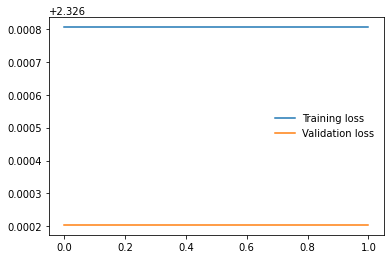

In [43]:
# visualize losses
plt.plot(training_losses, label="Training loss")
plt.plot(validation_losses, label="Validation loss")
plt.legend(frameon=False)

In [44]:
def dice_score(outputs, segmentations): # they find individual
  # outputs = torch.Size([2, 3, 128, 128, 128])
  # segmentations = torch.Size([2, 3, 128, 128, 128])
  # print(output.shape)
  # print(segmentations.shape)
  n_classes = segmentations.shape[1]
  region_scores = []
  for i in range(n_classes):
    outputs = outputs.view(-1)
    segmentations = segmentations.view(-1)
    numerator = 2*(outputs*segmentations).sum()
    denominator = outputs.sum() + segmentations.sum()
    dice = (numerator) / (denominator)
    region_scores.append(dice)
  return region_scores

In [45]:
"""
1 NECROTIC TUMOUR CORE (NCR — label 1) - index 0

2 GD-ENHANCING TUMOUR (ET — label 2) - index 1

3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3) - index 2
"""

'\n1 NECROTIC TUMOUR CORE (NCR — label 1) - index 0\n\n2 GD-ENHANCING TUMOUR (ET — label 2) - index 1\n\n3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3) - index 2\n'

In [46]:
for images, segs in testingloader:
    with torch.no_grad():
      print(len(images), len(segs))
      print(images.shape)
      print(segs.shape)
      images = images.squeeze().clone().detach().requires_grad_(True)
      # segs = segs.long() - no
      segs = segs.squeeze().clone().detach().requires_grad_(True)
      print(images.shape)
      print(segs.shape)
      outputs, softmax_outputs = model(images)
      print(outputs.shape)
      print(softmax_outputs.shape)
      print()

      print("......."*5)

      region_scores = dice_score(softmax_outputs, segs)

      print(len(region_scores))
      print(region_scores)

      print("1 NECROTIC TUMOUR CORE (NCR — label 1)")
      print(region_scores[0].item())
      print()

      print("2 GD-ENHANCING TUMOUR (ET — label 2)")
      print(region_scores[1].item())
      print()

      print("3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)")
      print(region_scores[2].item())

2 2
torch.Size([2, 1, 4, 128, 128, 128])
torch.Size([2, 1, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 24, 128, 128, 128])
torch.Size([2, 48, 64, 64, 64])
torch.Size([2, 96, 32, 32, 32])
torch.Size([2, 192, 16, 16, 16])
torch.Size([2, 320, 8, 8, 8])
torch.Size([2, 320, 4, 4, 4])
torch.Size([2, 192, 8, 8, 8])
torch.Size([2, 96, 16, 16, 16])
torch.Size([2, 48, 32, 32, 32])
torch.Size([2, 24, 64, 64, 64])
torch.Size([2, 24, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])
torch.Size([2, 3, 128, 128, 128])

...................................
3
[tensor(0.4000), tensor(0.4000), tensor(0.4000)]
1 NECROTIC TUMOUR CORE (NCR — label 1)
0.39997899532318115

2 GD-ENHANCING TUMOUR (ET — label 2)
0.39997899532318115

3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)
0.39997899532318115


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
